In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

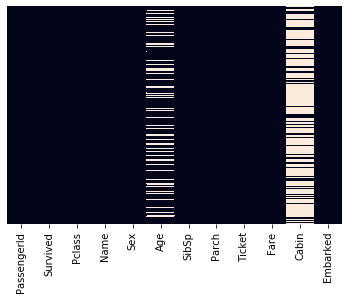

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


#Age and Cabin column has null values

In [10]:
df[['Survived']].groupby(df['Sex']).mean()
# 74% of female survived while only around 20% of male survived

,Survived
Sex,
female,0.742038
male,0.188908


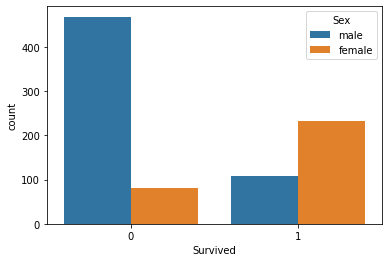

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [12]:
df[['Pclass']].groupby(df['Pclass']).count()

#Maximum passengers are in class 3

,Pclass
Pclass,
1,216
2,184
3,491


In [13]:
df[['Survived']].groupby(df['Pclass']).mean()
#Maximum passengers are in class 3 and survival rate is lowest
#Most of the class 1 passengers survived

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


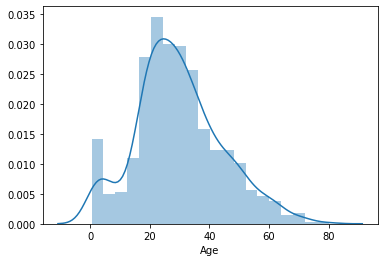

In [14]:
sns.distplot(df['Age'].dropna())

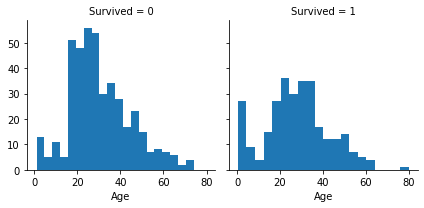

In [15]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age',bins=20)
# Age<=5 has highest survival rate
#age=80 survived

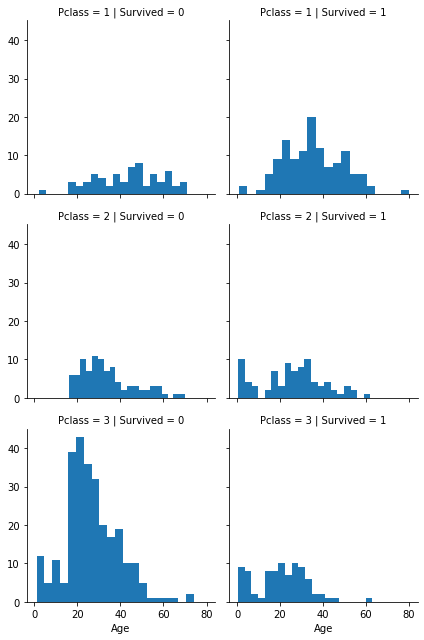

In [16]:
g=sns.FacetGrid(df,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20)
#Most of PClass 1 passengers survived
#Most of infants and children survived in PClass 2

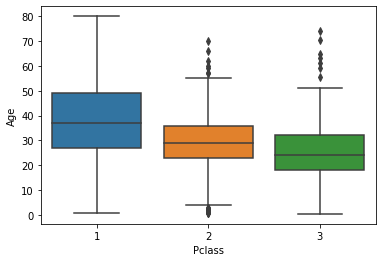

In [17]:
sns.boxplot(x='Pclass',y='Age',data=df)
# Age distribution in each class. Class 1 has older passengers compared to class 2 & 3

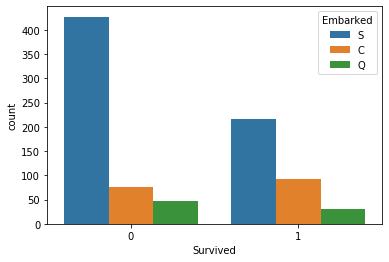

In [18]:
sns.countplot(x='Survived',hue='Embarked',data=df)
#there is no direct relationship between Embarked and Survival

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


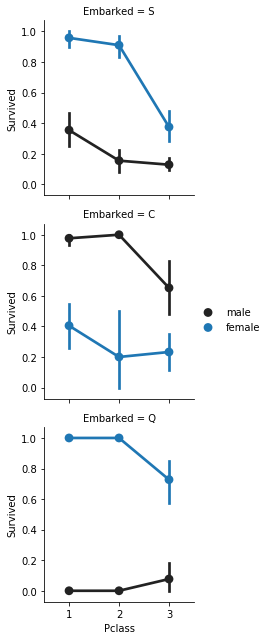

In [19]:
g=sns.FacetGrid(df,row='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

# Here we can see that for port C,Men have higher chance of survival so now 'embarked' seems to have some correlation with survival

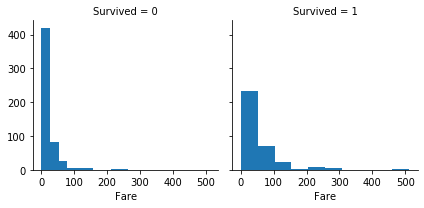

In [20]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Fare')

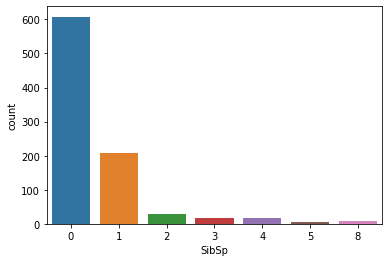

In [21]:
sns.countplot(x='SibSp',data=df)
# Most passengers are without siblings or spouse

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Cleaning the data

In [23]:
#Dropping irrelevant columns
df.drop(['Cabin','Ticket','PassengerId','Name'],axis=1,inplace=True)

In [24]:
df.shape

(891, 8)

In [25]:
df.groupby(['Pclass','Sex'])['Age'].median()

# taking avg of age for each Pclass and gender

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [26]:
df['Age_new']=df.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))

In [27]:
age=(df['Age'].isnull()==True)
df.loc[age].tail(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_new
776,0,3,male,NaN,0,0,7.7500,Q,25.0
778,0,3,male,NaN,0,0,7.7375,Q,25.0
783,0,3,male,NaN,1,2,23.4500,S,25.0
790,0,3,male,NaN,0,0,7.7500,Q,25.0
792,0,3,female,NaN,8,2,69.5500,S,21.5
793,0,1,male,NaN,0,0,30.6958,C,40.0
815,0,1,male,NaN,0,0,0.0000,S,40.0
825,0,3,male,NaN,0,0,6.9500,Q,25.0
826,0,3,male,NaN,0,0,56.4958,S,25.0
828,1,3,male,NaN,0,0,7.7500,Q,25.0


In [28]:
#As we have handled null values in Age providing a new column, we can drop Age
df.drop('Age',axis=1, inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_new
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


In [30]:
df=df.rename(columns={'Age_new':'Age'})
df
#renaming new age column to'Age'

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,27.0
887,1,1,female,0,0,30.0000,S,19.0
888,0,3,female,1,2,23.4500,S,21.5
889,1,1,male,0,0,30.0000,C,26.0


In [31]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
#Replaced two missing column in Embarked column with mode

In [32]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age         0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Age         891 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Feature Engineering

In [109]:
df.shape

(891, 8)

In [149]:
test=pd.read_csv('test_cleaned.csv')
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [150]:
data=pd.concat([df,test],axis=0,ignore_index=True,sort=True)

In [151]:
data.iloc[0:891].isnull().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [152]:
data.iloc[891:].isnull().sum()

Age           0
Embarked      0
Fare          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
dtype: int64

In [153]:
#dropping Embarked Column after checking feature importance
data.drop('Embarked',axis=1,inplace=True)

In [154]:
#Encoding Categorical features
#data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})

data['Sex']=data['Sex'].map({'male':0,'female':1})

#data=pd.get_dummies(data=data,columns=['Sex','Embarked'],drop_first=True)

In [155]:
data.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,7.2500,0,3,0,1,0.0
1,38.0,71.2833,0,1,1,1,1.0
2,26.0,7.9250,0,3,1,0,1.0
3,35.0,53.1000,0,1,1,1,1.0
4,35.0,8.0500,0,3,0,0,0.0


In [156]:
data['Age']=data['Age'].astype(int)

In [157]:
labels=[0,1,2,3,4]
data['AgeBand']=pd.cut(data['Age'],5)
data['AgeLabel']=pd.cut(data['Age'],5,labels=labels)

In [158]:
data[['Survived']].groupby(data['AgeBand']).mean()

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [159]:

data.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,AgeBand,AgeLabel
0,22,7.2500,0,3,0,1,0.0,"(16.0, 32.0]",1
1,38,71.2833,0,1,1,1,1.0,"(32.0, 48.0]",2
2,26,7.9250,0,3,1,0,1.0,"(16.0, 32.0]",1
3,35,53.1000,0,1,1,1,1.0,"(32.0, 48.0]",2
4,35,8.0500,0,3,0,0,0.0,"(32.0, 48.0]",2


In [160]:
pd.unique(data[['AgeBand','AgeLabel']].values.ravel())

array([Interval(16.0, 32.0, closed='right'), 1,
       Interval(32.0, 48.0, closed='right'), 2,
       Interval(48.0, 64.0, closed='right'), 3,
       Interval(-0.08, 16.0, closed='right'), 0,
       Interval(64.0, 80.0, closed='right'), 4], dtype=object)

In [161]:
#we have labeled Age column as per age band so we can drop AgeBand and Age Column now
data.drop(['Age','AgeBand'],axis=1,inplace=True)

In [162]:
data.head()

,Fare,Parch,Pclass,Sex,SibSp,Survived,AgeLabel
0,7.2500,0,3,0,1,0.0,1
1,71.2833,0,1,1,1,1.0,2
2,7.9250,0,3,1,0,1.0,1
3,53.1000,0,1,1,1,1.0,2
4,8.0500,0,3,0,0,0.0,2


In [163]:
data['FamilySize']=data['Parch']+data['SibSp']+1
data[['Survived']].groupby(data['FamilySize']).mean().sort_values(by='Survived',ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [164]:
data['FamilyLabel']=0
data.loc[(data.FamilySize==1),'FamilyLabel']=0
data.loc[(data.FamilySize>1) & (data.FamilySize<=4),'FamilyLabel']=1
data.loc[(data.FamilySize>4),'FamilyLabel']=2

In [165]:
#Now we can drop Parch,SibSp and Family Size column
data.drop(['FamilySize','SibSp','Parch'],axis=1,inplace=True)

In [166]:

data

,Fare,Pclass,Sex,Survived,AgeLabel,FamilyLabel
0,7.2500,3,0,0.0,1,1
1,71.2833,1,1,1.0,2,1
2,7.9250,3,1,1.0,1,0
3,53.1000,1,1,1.0,2,1
4,8.0500,3,0,0.0,2,0
...,...,...,...,...,...,...
1304,8.0500,3,0,NaN,1,0
1305,108.9000,1,1,NaN,2,0
1306,7.2500,3,0,NaN,2,0
1307,8.0500,3,0,NaN,1,0


In [167]:
labels=[0,1,2,3,4]
data['FareBand']=pd.qcut(data['Fare'],5)
data['FareLabels']=pd.qcut(data['Fare'],5,labels=labels)
result,bins=pd.qcut(data['Fare'],5,labels=labels,retbins=True)
pd.DataFrame(zip(bins,labels))

,0,1
0,0.00000,0
1,7.85420,1
2,10.50000,2
3,21.55836,3
4,41.57920,4


In [168]:
pd.unique(data[['FareBand','FareLabels']].values.ravel())

array([Interval(-0.001, 7.854, closed='right'), 0,
       Interval(41.579, 512.329, closed='right'), 4,
       Interval(7.854, 10.5, closed='right'), 1,
       Interval(10.5, 21.558, closed='right'), 2,
       Interval(21.558, 41.579, closed='right'), 3], dtype=object)

In [169]:
data[['Survived']].groupby(data['FareLabels']).mean().sort_values(by='Survived',ascending=False)

,Survived
FareLabels,
4,0.645349
3,0.443243
2,0.426901
0,0.217877
1,0.201087


In [170]:

#we can delete Fare and Fareband column now
data.drop(['Fare','FareBand'],axis=1,inplace=True)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
Pclass         1309 non-null int64
Sex            1309 non-null int64
Survived       891 non-null float64
AgeLabel       1309 non-null category
FamilyLabel    1309 non-null int64
FareLabels     1309 non-null category
dtypes: category(2), float64(1), int64(3)
memory usage: 44.0 KB


In [172]:
#Converting object type to integer
data['FareLabels']=data['FareLabels'].astype(str).astype(int)
data['AgeLabel']=data['AgeLabel'].astype(str).astype(int)

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
Pclass         1309 non-null int64
Sex            1309 non-null int64
Survived       891 non-null float64
AgeLabel       1309 non-null int32
FamilyLabel    1309 non-null int64
FareLabels     1309 non-null int32
dtypes: float64(1), int32(2), int64(3)
memory usage: 51.3 KB


In [174]:
train=data.iloc[0:891]
test_df=data.iloc[891:]

In [175]:
train

,Pclass,Sex,Survived,AgeLabel,FamilyLabel,FareLabels
0,3,0,0.0,1,1,0
1,1,1,1.0,2,1,4
2,3,1,1.0,1,0,1
3,1,1,1.0,2,1,4
4,3,0,0.0,2,0,1
...,...,...,...,...,...,...
886,2,0,0.0,1,0,2
887,1,1,1.0,1,0,3
888,3,1,0.0,1,1,3
889,1,0,1.0,1,0,3


In [176]:
test_df

,Pclass,Sex,Survived,AgeLabel,FamilyLabel,FareLabels
891,3,0,NaN,2,0,0
892,3,1,NaN,2,1,0
893,2,0,NaN,3,0,1
894,3,0,NaN,1,0,1
895,3,1,NaN,1,1,2
...,...,...,...,...,...,...
1304,3,0,NaN,1,0,1
1305,1,1,NaN,2,0,4
1306,3,0,NaN,2,0,0
1307,3,0,NaN,1,0,1


In [180]:
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']
X_test=test_df.drop('Survived',axis=1)
X_train.shape, y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [182]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:
prediction=model.predict(X_test).astype(int)
type(prediction)
prediction

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [184]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
print("Accuracy:", score)
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Accuracy: [0.77777778 0.82222222 0.75280899 0.78651685 0.85393258 0.79775281
 0.83146067 0.82022472 0.83146067 0.82954545]
Mean: 0.810370275791624
Standard Deviation: 0.029148429782267338


In [144]:
#feat_importance=pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
#feat_importance=feat_importance.sort_values('importance',ascending=False)
#feat_importance

We can train the model again removing Embarked Column as it has importance=0.062

,feature,importance
2,Sex,0.406
1,Pclass,0.152
5,FareLabels,0.149
3,AgeLabel,0.129
4,FamilyLabel,0.101
0,Embarked,0.062


In [185]:
feat_importance=pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
feat_importance=feat_importance.sort_values('importance',ascending=False)
feat_importance

,feature,importance
1,Sex,0.457
0,Pclass,0.156
4,FareLabels,0.155
2,AgeLabel,0.122
3,FamilyLabel,0.109


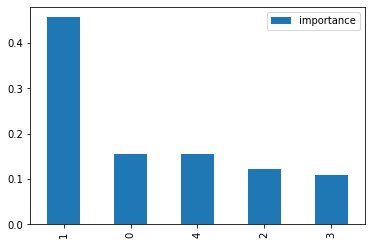

In [186]:
feat_importance.plot.bar()

In [190]:
testdata=pd.read_csv('test.csv')
testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [191]:
submission=pd.DataFrame({'PassengerId':testdata['PassengerId'],'Survived':prediction})
submission.to_csv('submission.csv',index=False)

In [192]:
s=pd.read_csv('submission.csv')
s

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
